In [1]:
import sys
import pathlib
src_path = pathlib.Path().absolute().parent /"src"
sys.path.append(str(src_path))
import data_functions

Our next step we split our independent variables, and our target variables. This step was not entirely necessary. Initially it was done because we had already done preliminary eda, and were attempting to work up to running a model. However we ended up doing 

In [2]:
X_train, X_test, y_train = data_functions.get_dataframes()

In [3]:
X_train.shape #taking a first look at the size of our data

(59400, 39)

In [4]:
print(X_train.isna().sum()) 
X_nums_train=X_train.select_dtypes(exclude="object")
X_cat_train= X_train.select_dtypes(include="object")
print(X_nums_train.isna().sum())
print(X_cat_train.isna().sum())




amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

In [5]:
X_train[X_train['funder'].isna() & X_train['installer'].isna()]


,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
41583,0.0,2011-02-23,NaN,-41,NaN,39.812912,-7.889986,Msikitini Wa Ijumaa,0,Rufiji,...,never pay,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
19282,0.0,2013-01-15,NaN,1642,NaN,34.967789,-4.628921,Mvae Primary,0,Internal,...,unknown,unknown,unknown,dry,dry,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
13620,0.0,2011-07-27,NaN,0,NaN,33.540607,-9.172905,Mahakamani,0,Lake Nyasa,...,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
51072,0.0,2013-02-09,NaN,1415,NaN,34.621598,-5.173136,Nyambi,0,Internal,...,unknown,unknown,unknown,dry,dry,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
17386,0.0,2011-03-31,NaN,0,NaN,34.462228,-8.575780,Kwa Manyusi Mlilo,0,Rufiji,...,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46563,0.0,2013-02-19,NaN,1635,NaN,34.971841,-5.098362,Shabani,0,Internal,...,unknown,unknown,unknown,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump
55232,0.0,2013-02-02,NaN,1541,NaN,34.765729,-5.027725,Joshoni,0,Internal,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
14796,200.0,2013-01-29,NaN,1154,NaN,30.058731,-4.902633,Village Office,0,Lake Tanganyika,...,monthly,unknown,unknown,unknown,unknown,unknown,other,unknown,other,other


In [6]:
X_train.scheme_name.value_counts()

K                          682
None                       644
Borehole                   546
Chalinze wate              405
M                          400
                          ... 
World Bank Water Supply      1
Mradi wa maji wa izia        1
Samunge water scheme         1
BL Kyongwa                   1
BL Majengo                   1
Name: scheme_name, Length: 2696, dtype: int64

In [7]:
for col_name in X_cat_train.columns:
    if X_cat_train[col_name].dtypes =='object':
        unique_cat= len(X_cat_train[col_name].unique())
        print(col_name, unique_cat)

date_recorded 356
funder 1898
installer 2146
wpt_name 37400
basin 9
subvillage 19288
region 21
lga 125
ward 2092
public_meeting 3
recorded_by 1
scheme_management 13
scheme_name 2697
permit 3
extraction_type 18
extraction_type_group 13
extraction_type_class 7
management 12
management_group 5
payment 7
payment_type 7
water_quality 8
quality_group 6
quantity 5
quantity_group 5
source 10
source_type 7
source_class 3
waterpoint_type 7
waterpoint_type_group 6


In [8]:
X_cat_train['water_quality'].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [9]:
X_cat_train['quality_group'].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

In [10]:
y_train.status_group.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [11]:
print(len(X_cat_train.columns))

30


In [12]:
X_cat_train.installer.value_counts()


DWE                      17402
Government                1825
RWE                       1206
Commu                     1060
DANIDA                    1050
                         ...  
CALTAZ KAHAMA                1
WORLD NK                     1
TLC/Seleman Mang'ombe        1
WINAMU CO                    1
KISIRIRI ADP                 1
Name: installer, Length: 2145, dtype: int64

In [13]:
#X_cat_train['installer'].value_counts() < 3
#X_cat_train['other']=X_cat_train[(X_cat_train['installer'].value_counts() < 3)]

In [14]:
X_cat_train.ward.value_counts()

Igosi        307
Imalinyi     252
Siha Kati    232
Mdandu       231
Nduruma      217
            ... 
Ifinga         1
Mawenzi        1
Kitete         1
Uchindile      1
Mitole         1
Name: ward, Length: 2092, dtype: int64

In [15]:
X_cat_train.public_meeting.isna().sum()

3334

In [16]:
X_cat_train.source.value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [17]:
X_cat_train.source_type.value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [18]:
X_cat_train.source_class.value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [19]:
X_nums_train.columns

Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private',
       'region_code', 'district_code', 'population', 'construction_year'],
      dtype='object')

In [20]:
sum(X_nums_train.num_private)

28164

In [21]:
X_nums_train.district_code.unique()

array([ 5,  2,  4, 63,  1,  8,  3,  6, 43,  7, 23, 33, 53, 62, 60, 30, 13,
        0, 80, 67], dtype=int64)

In [22]:
X_cat_train.columns

Index(['date_recorded', 'funder', 'installer', 'wpt_name', 'basin',
       'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [23]:
X_cat_train.scheme_management.value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [24]:
X_train.columns

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'num_private', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'recorded_by', 'scheme_management',
       'scheme_name', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [25]:
X_train_strict_feat = X_train.drop(['date_recorded','funder','wpt_name', 'subvillage','ward','recorded_by','scheme_name','scheme_management','extraction_type',
             'extraction_type_class','payment','public_meeting','permit','management','management_group','source','source_class',
             'waterpoint_type_group','latitude','longitude','num_private','region_code','district_code'], axis=1)


X_train_loose_feat=X_train.drop(['date_recorded','funder','installer','wpt_name', 'subvillage','recorded_by','scheme_name','extraction_type',
             'extraction_type_class','payment','management','management_group','source_class',
             'waterpoint_type_group','latitude','longitude','num_private','region_code','district_code'], axis=1)



In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [27]:
from sklearn.impute import SimpleImputer

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder

In [29]:
import seaborn as sns


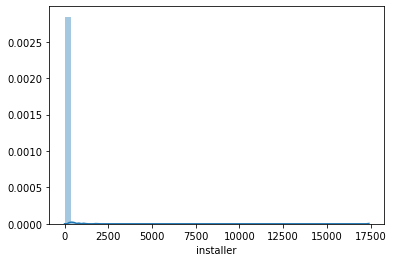

In [33]:
sns.distplot(X_cat_train['installer'].value_counts())


In [ ]:
X_train_strict_feat

In [ ]:
scaled_pipeline_KNN= Pipeline([('si',SimpleImputer()),
                               ('ss', StandardScaler()),
                              ('dt',DecisionTreeClassifier())])
scaled_pipeline_1.fit()